# CS5016 Computational Methods & Applications

**Lecture 2, 16/Jan/2025**

*Agenda*
1. Illustrate some of the numerical methods of solving ODEs

## Numerically Solving Ordinary Differential Equations

A first order Ordinary Differential Equation (ODE) can be written in the form
$$\frac{dy(t)}{dt} = f(y(t), t)$$
Here, $y$ can be an $\mathbb{R}$-valued or vector-valued function. If $y(t) = (y_1(t), \ldots, y_k(t))$, then $\frac{dy(t)}{dt} = (\frac{dy_1(t)}{dt}, \ldots, \frac{dy_k(t)}{dt})$.

Higher order ODEs can also be converted to a system of first order ODEs and then represented as a single ODE of a vector-valued function.

## Initial Value Problem (IVP)

An *Initial Value Problem* is an ODE together with the value of $y$ at some point $t_0$. The task then is to find a solution for $y$ in some interval $[a, b]$. (Usually $a = t_0$).

A unique solution is guaranteed if $f$ satisfies certain continuity conditions. [Picard–Lindelöf theorem](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem).

## Numerical Solution

Solving an IVP analytically (symbollically) can be hard or even impossible (?). But there are multiple ways to solve any IVP numerically. The `solve_ivp` function in `numpy.integrate` supports five such methods - RK23, RK45, DOP853, BDF, LSODA, with RK45 being the default.

### Examples

\begin{align*}
    \frac{dy}{dt} &= \frac{1}{ty} & y(0) = 1\\
    \frac{dy}{dt} &= \sin(ty) & y(0) = 1
\end{align*}

Solve the above in the interval $[1, 100]$.

In [48]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

In [49]:
# Setup the IVP (dy/dt, initial conditions, time steps)

def f(t, y):
    return 1.0/(t * y)

# initial condition
ya = 1

# solution interval
a, b = 1, 100

# time steps
t_eval = np.linspace(a, b, 100)

In [50]:
# Solve the IVP using the built-in function solve_ivp and plot the result

y_exact = [math.sqrt(1 + 2*math.log(t)) for t in t_eval]
sol = integrate.solve_ivp(f, (a,b), [y0], t_eval=t_eval)
y_ivp = sol["y"][0].copy()

### Exact Solution 

The IVP $$\frac{dy}{dt} = \frac{1}{ty}, \quad y(0) = 1$$ 
can be solved analytically and the exact solution is 
$$y(t) = \sqrt{1 + 2 \log(t)}$$


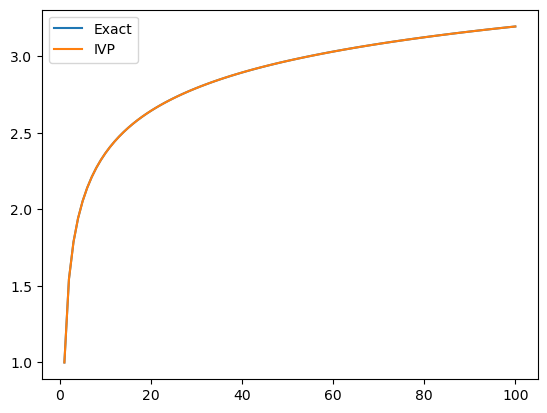

In [51]:
# Compare the numerical solution with the exact solution for the above IVP

plt.plot(t_eval, y_exact, label="Exact")
plt.plot(t_eval, y_ivp, label="IVP")
plt.legend()

## What do these numerical methods do?

Solve the IVP
$$\frac{dy(t)}{dt} = f(y(t), t), \quad y(t_0) = y_0$$
in the interval $[t_0, t_f]$ for some $t_f > t_0$.

Let's start with $y$ being a scalar function.


### First order approximation (Forward Euler or First Order Runge-Kutta)

1. Sample a sequence of time points $t_0, t_1, \ldots, t_n = t_f$ from the interval $[t_0, t_f]$.
2. Estimate $y$ at $t_0, t_1, \ldots, t_f$.
\begin{align*}
    y_1 &= y_0 + f(y_0, t_0) (t_1 - t_0) \\
    y_2 &= y_1 + f(y_1, t_1) (t_2 - t_1) \\
    \ldots
\end{align*}
3. $y_i$ is our approximation for $y(t_i)$.

In [52]:
# Implement the Forward Euler Method, with a similar interface to solve_ivp 

def forward_euler(f, T, ya, t_eval=t_eval):
    y = [ya]
    for i in range(len(t_eval)-1):
        t1, t2 = t_eval[i], t_eval[i+1]
        y1 = y[-1]
        h  = t2 - t1
        k  = f(t1, y1)
        y2 = y1 + k*h
        y.append(y2)

    return y

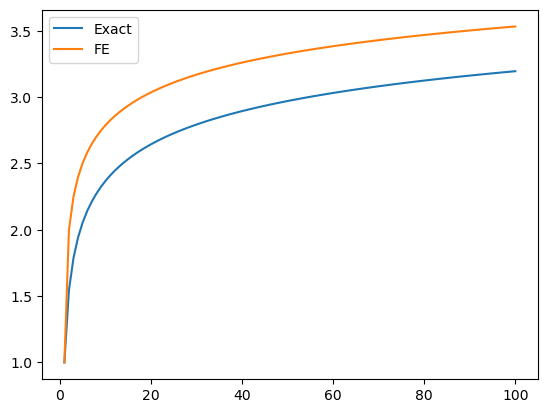

In [53]:
# Using rk1 (fe), solve the IVP for which we know the exact solution and compare the solutions

y_exact = [math.sqrt(1 + 2*math.log(t)) for t in t_eval]
y_fe = forward_euler(f, (a,b), y0, t_eval)

plt.plot(t_eval, y_exact, label="Exact")
plt.plot(t_eval, y_fe, label="FE")
plt.legend()

### Second order approximation (Runge-Kutta-2)

1. Sample a sequence of time points $t_0, t_1, \ldots, t_n = t_f$ from the interval $[t_0, t_f]$.
2. Estimate $y$ at $t_0, t_1, \ldots, t_f$.
\begin{align*}
    k_1  &= f(y_i, t_i) \\
    y'   &= y_i + k_1 (t_{i+1} - t_i) \\
    k_2  &= f(y', t_{i+1}) \\
    k &= (k_1 + k_2)/2 \\
    y_{i+1} &= y_1 + k (t_2 - t_1) \\
    \ldots
\end{align*}
4. $y_i$ is our approximation for $y(t_i)$.

In [54]:
# Implement the Second Order Runge-Kutta method with a similar interface to solve_ivp 

def rk2(f, T, ya, t_eval=t_eval):
    y = [ya]
    for i in range(len(t_eval)-1):
        t1, t2 = t_eval[i], t_eval[i+1]
        y1 = y[-1]
        h  = t2 - t1
        k1 = f(t1, y1)
        y2 = y1 + k1*h
        k2 = f(t2, y2)
        k = (k1 + k2)/2.0
        y2 = y1 + k*h
        y.append(y2)

    return y

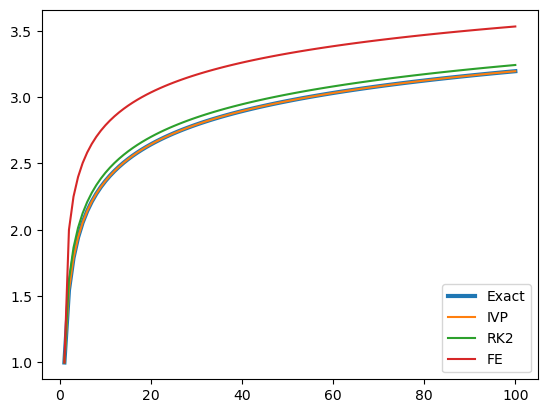

In [57]:
# Using rk2, solve the IVP for which we know the exact solution and compare the solutions

y_rk2 = rk2(f, (a,b), y0, t_eval)

plt.plot(t_eval, y_exact, linewidth=3, label="Exact")
plt.plot(t_eval, y_ivp, label="IVP")
plt.plot(t_eval, y_rk2, label="RK2")
plt.plot(t_eval, y_fe, label="FE")

plt.legend()

### Fourth order approximation (Runge-Kutta-4)

1. Sample a sequence of time points $t_0, t_1, \ldots, t_n = t_f$ from the interval $[t_0, t_f]$.
2. Estimate $y$ at $t_0, t_1, \ldots, t_f$.
\begin{align*}
    t_m & = (t_i + t_{i+1})/2 \\
    k_1 &= f(y_i, t_i) \\
    y'  &= y_i + k_1 (t_m - t_i) \\
    k_2  &= f(y', t_m) \\
    y'  &= y_i + k_2 (t_m - t_i) \\
    k_3  &= f(y', t_m) \\
    y'  &= y_i + k_3 (t_2 - t_i) \\
    k_4  &= f(y', t_m) \\
    k &= (k_1 + 2k_2 + 2k_3 + k_4)/6 \\
    y_{i+1} &= y_1 + k (t_2 - t_1) \\
    \ldots
\end{align*}
3. $y_i$ is our approximation for $y(t_i)$.
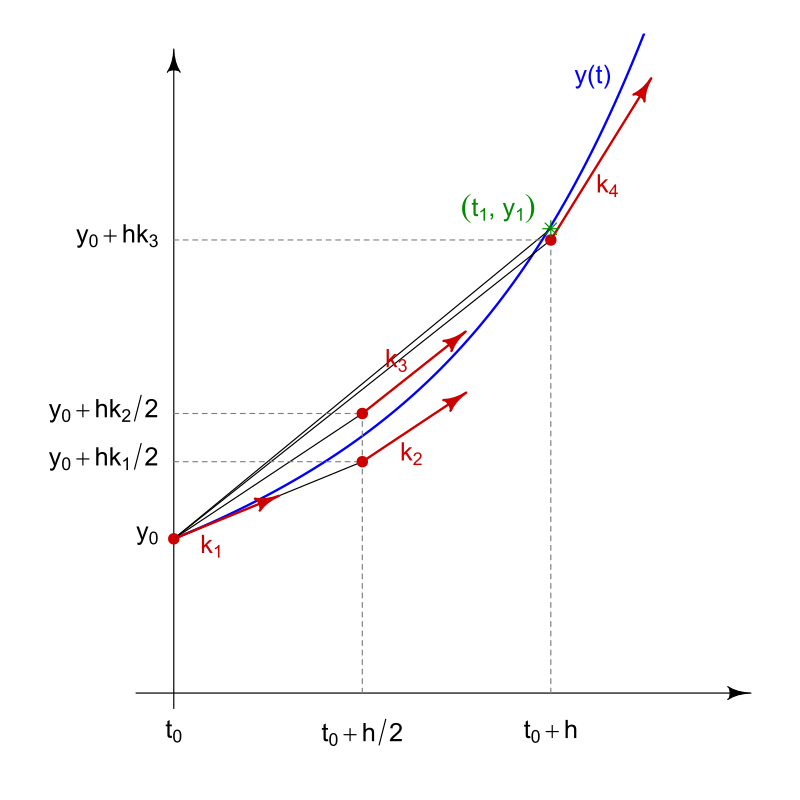

In [58]:
# Implement the Fourth Order Runge-Kutta method with a similar interface to solve_ivp 

def rk4(f, T, ya, t_eval=t_eval):
    y = [ya]
    for i in range(len(t_eval)-1):
        t1, t2 = t_eval[i], t_eval[i+1]
        tm = (t1 + t2)/2.0
        y1 = y[-1]
        h  = t2 - t1
        k1 = f(t1, y1)
        y2 = y1 + k1*(h/2.0)
        k2 = f(tm, y2)
        y2 = y1 + k2*(h/2.0)
        k3 = f(tm, y2)
        y2 = y1 + k3*h
        k4 = f(t2, y2)
               
        k = (k1 + 2*k2 + 2*k3 + k4)/6.0
        y2 = y1 + k*h
        y.append(y2)

    return y

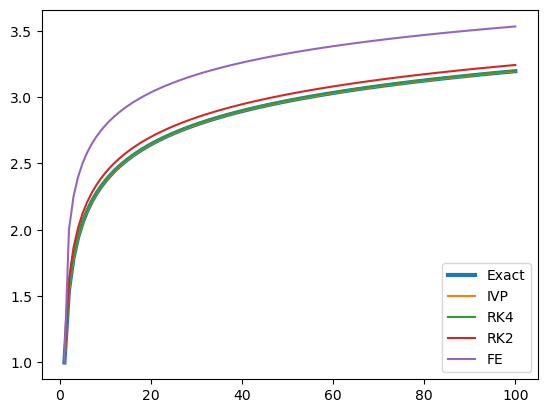

In [59]:
# Using rk4, solve the IVP for which we know the exact solution and compare the solutions

y_rk4 = rk4(f, (a,b), y0, t_eval)

plt.plot(t_eval, y_exact, linewidth=3, label="Exact")
plt.plot(t_eval, y_ivp, label="IVP")
plt.plot(t_eval, y_rk4, label="RK4")
plt.plot(t_eval, y_rk2, label="RK2")
plt.plot(t_eval, y_fe, label="FE")

plt.legend()